In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [14]:
HouseDF = pd.read_csv('USA_Housing.csv')

In [15]:
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [17]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

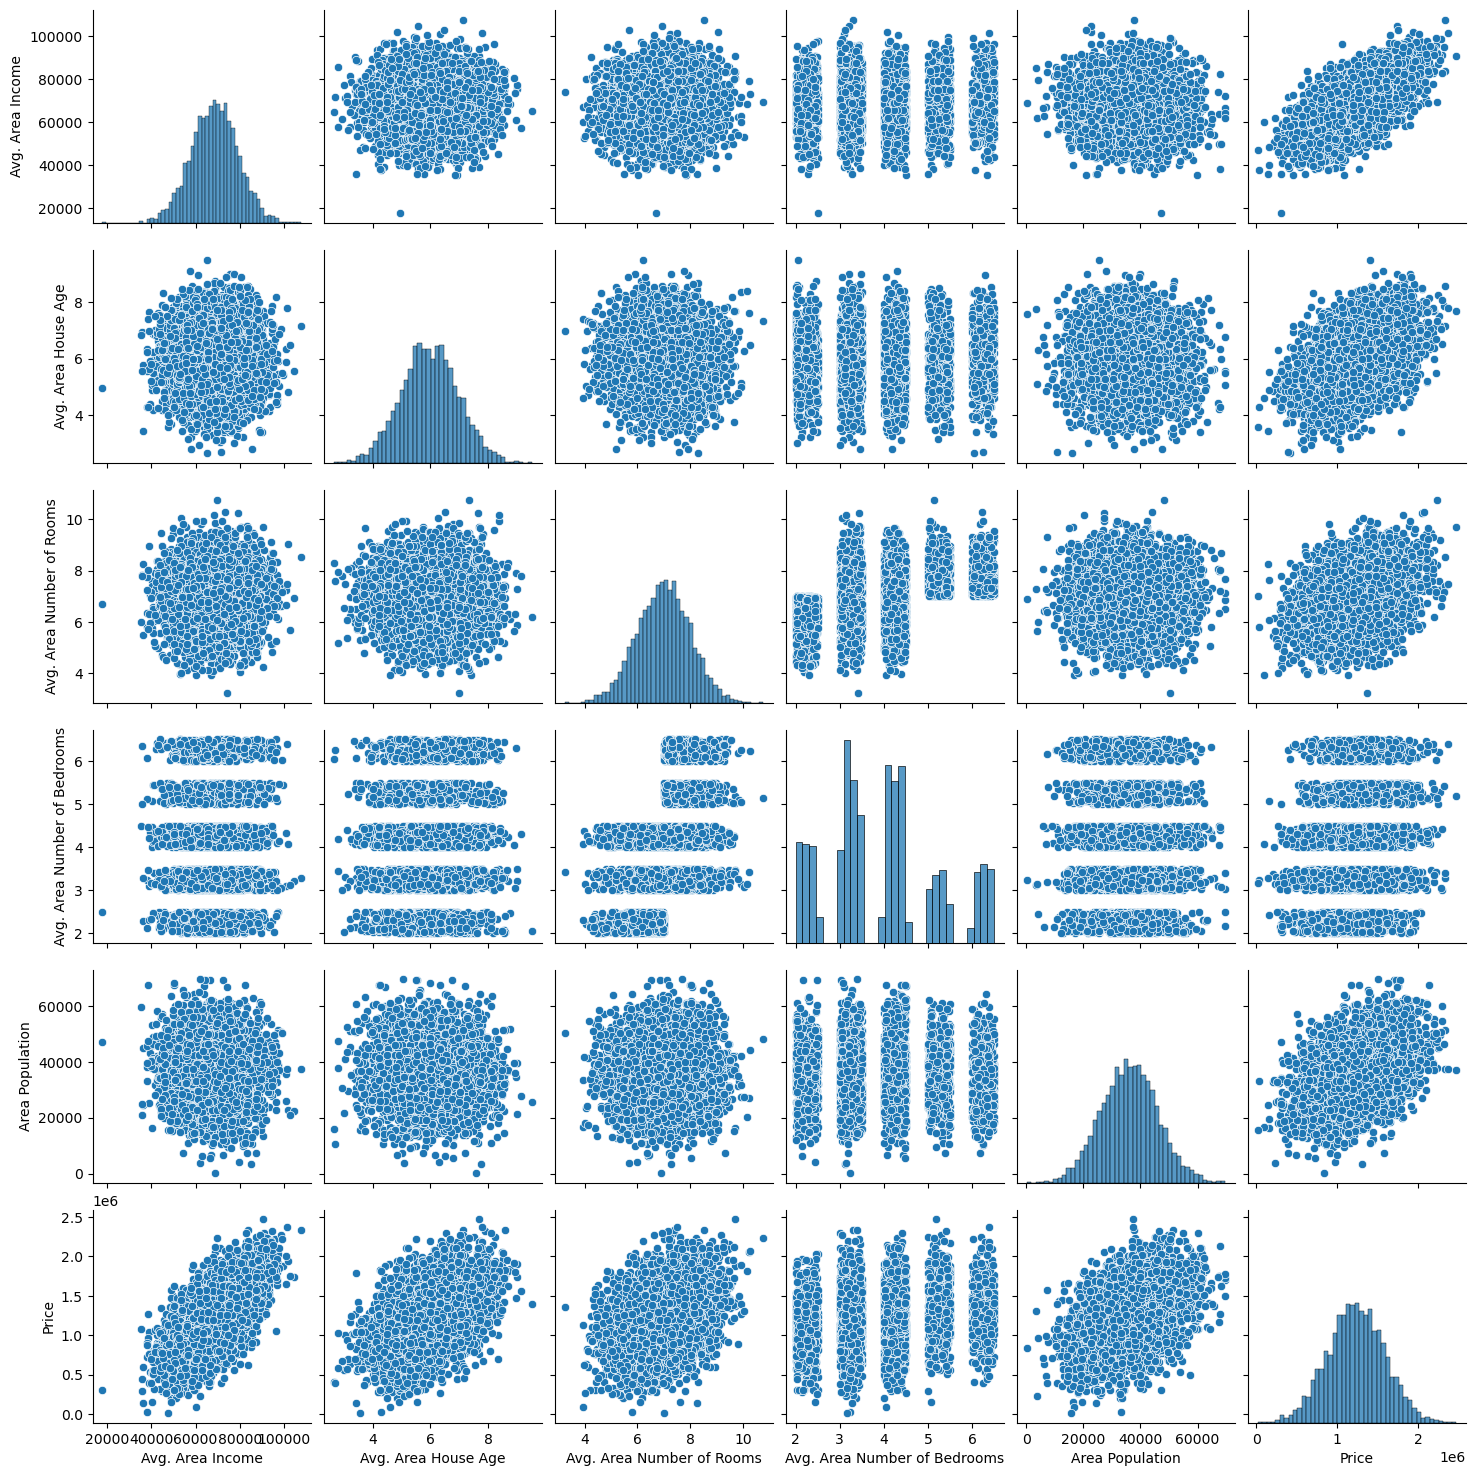

In [11]:
sns.pairplot(HouseDF)
plt.show()


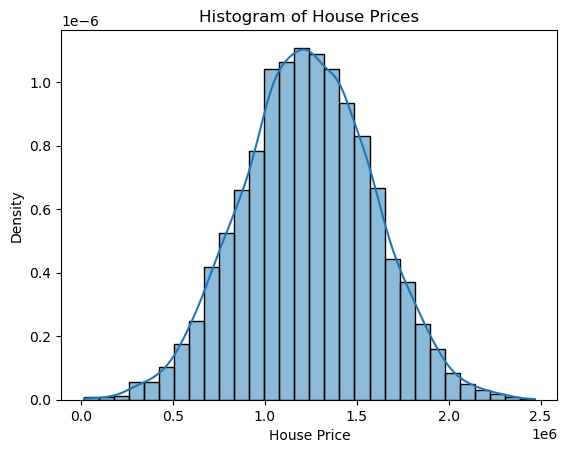

In [19]:
sns.histplot(HouseDF['Price'], bins=30, kde=True, stat="density")
plt.xlabel("House Price")
plt.ylabel("Density")
plt.title("Histogram of House Prices")
plt.show()



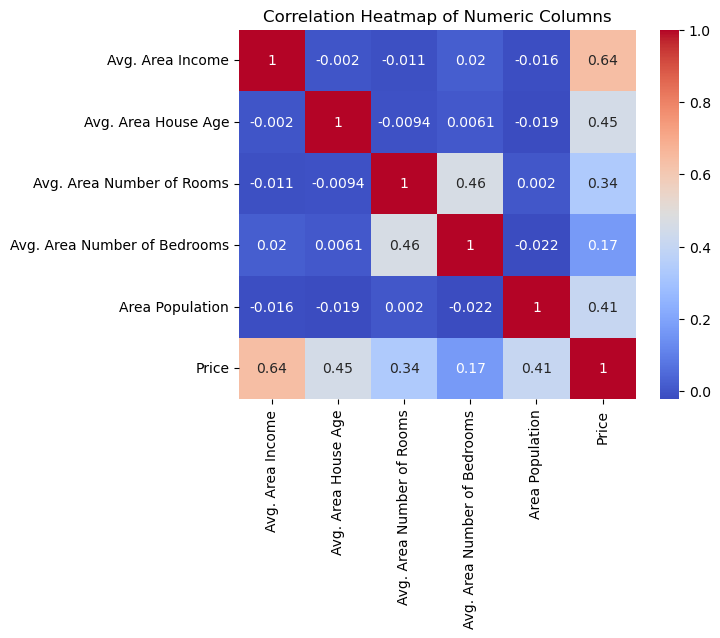

In [24]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [25]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
print(lm.intercept_)

-2640159.7968519107


In [34]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [35]:
predictions = lm.predict(X_test)

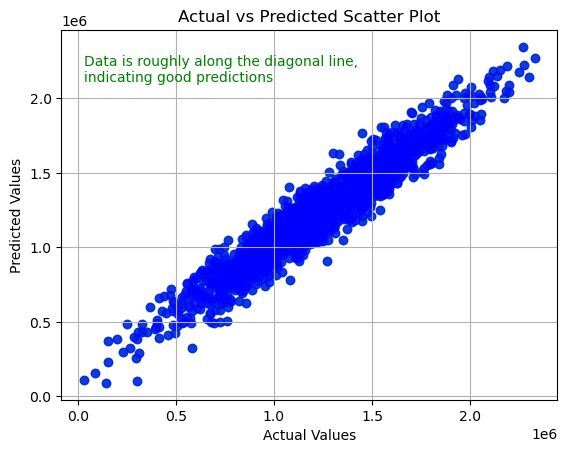

In [37]:
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.grid(True)

# Optional: add annotation text
plt.text(x=min(y_test), y=max(predictions)*0.9,
         s="Data is roughly along the diagonal line,\nindicating good predictions",
         fontsize=10, color='green')

plt.show()


In [40]:
# Residuals = Actual - Predicted
residuals = y_test - predictions

# Optional: check first few values
print(residuals[:10])


1718     -9272.089973
2511     45459.564039
345     -45443.579711
2521     89338.900475
54      -49929.566311
2866     84289.556693
2371     83709.236994
2952   -149890.831933
45       54317.479217
4653     85353.138340
Name: Price, dtype: float64


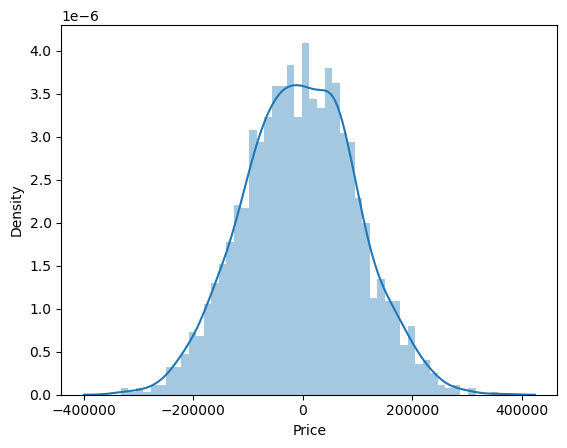

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 691, 9105380766, 100.0

<Figure size 800x500 with 1 Axes>

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True, color='blue', stat="density")
plt.xlabel("Residuals (y_test - predictions)")
plt.ylabel("Density")
plt.title("Histogram of Residuals (Prediction Errors)")

# Add descriptive text
plt.text(x=residuals.min(), y=max(np.histogram(residuals, bins=50)[0])*0.9,
         s="Residuals are bell-shaped (Normally Distributed)\n=> Model predictions are good",
         fontsize=10, color='green')

plt.show()


In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914954
MSE: 10460958907.209497
RMSE: 102278.8292229115
